![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [3]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [4]:
# Celda 1.1
bikes.groupby('season').total.mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: total, dtype: float64

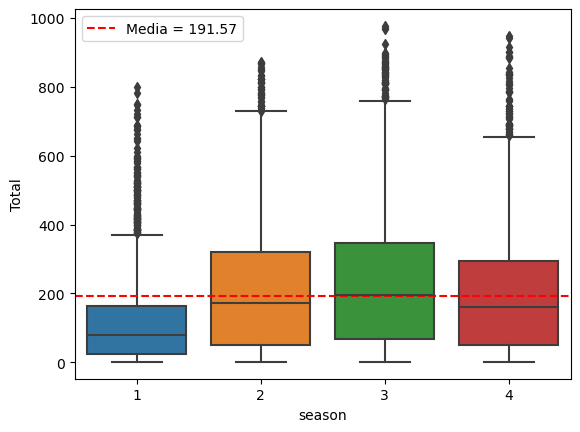

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
sns.boxplot(x=bikes['season'], y=bikes['total'], data=bikes, ax=ax)
ax.set_ylabel('Total')
media = bikes['total'].mean()
ax.axhline(y=media, color='red', linestyle='--', label=f'Media = {media:.2f}')
ax.legend()
plt.show()

#1:invierno, 2:primavera, 3:verano, 4:otoño

Después de analizar los datos, se evidencia que durante el verano se alquilan más bicicletas en promedio por hora (234) en comparación con el invierno (116). Al analizar el diagrama de caja, se observa que el rango intercuartilico es más amplio en verano. Además, se observa que aunque el tercer cuartil del invierno está por debajo de la media (192), existen datos atípicos que muestran alquileres de hasta 800 bicicletas en una hora. Adicionalmente se observa que el comportamiento del alquiler de bicicletas por hora en primavera es similar al del verano, aunque se nota una leve disminución.

In [6]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

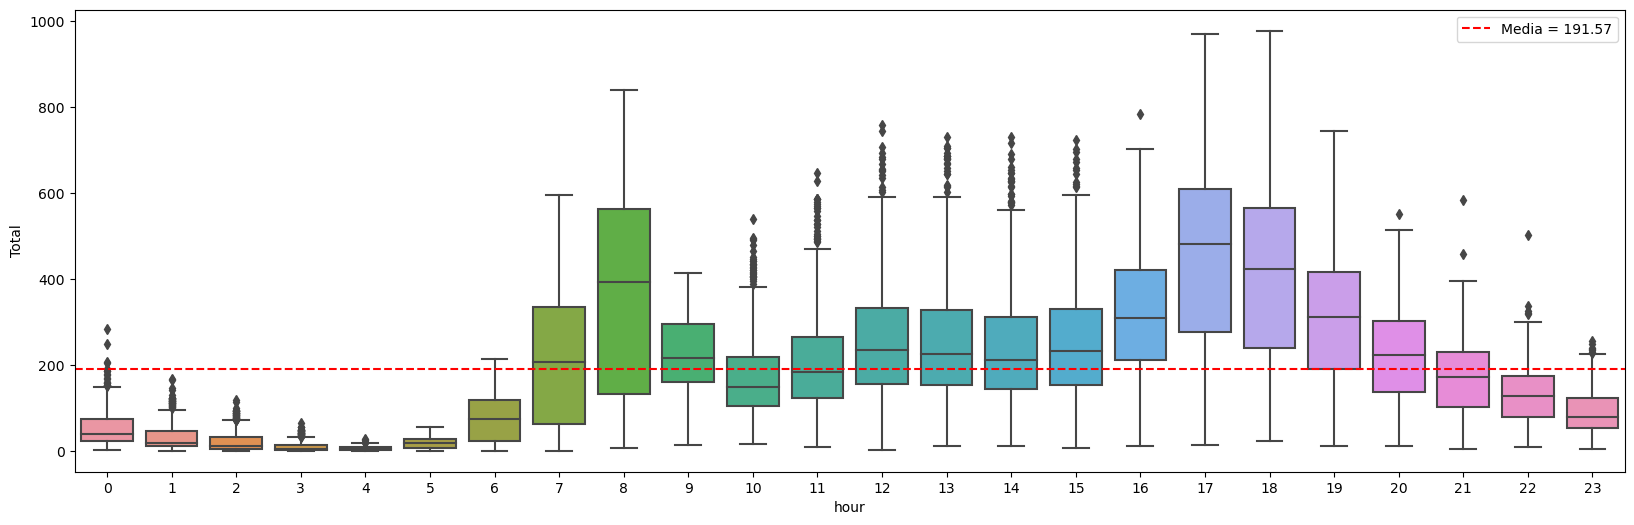

In [7]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.boxplot(x=bikes['hour'], y=bikes['total'], data=bikes, ax=ax)
ax.set_ylabel('Total')
media = bikes['total'].mean()
ax.axhline(y=media, color='red', linestyle='--', label=f'Media = {media:.2f}')
ax.legend()
plt.show()

Se observa que la hora con mayor alquiler de bicicletas es a las 5 de la tarde, mientras que la menos alquileres tiene es a las 4 de la mañana. Las horas 5 y 6 de la tarde tienen un comportamiento similar, aunque ligeramente más bajo a las 6, sin embargo al analizar los extremos superiores, se tiene una cifra similar cercana a 900 biciletas. Además, la hora de las 8 de la mañana muestra una gran variabilidad, como se evidencia en el rango intercuartílico que va desde aproximadamente 180 hasta 600 alquileres de bicicletas.

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<Axes: xlabel='hour'>

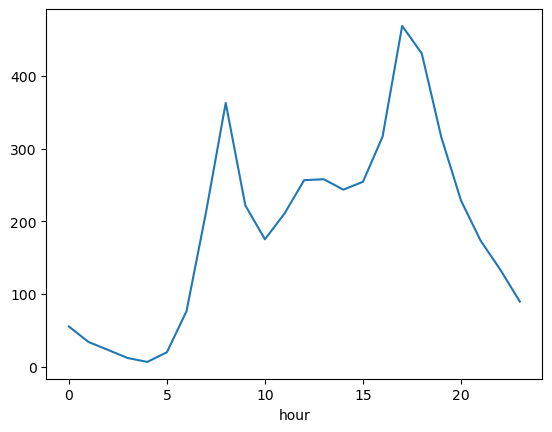

In [8]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

<Axes: xlabel='hour'>

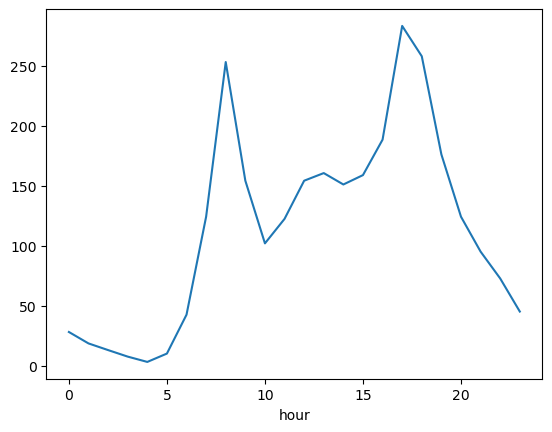

In [9]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos
bikes[bikes['season'] == 1].groupby('hour').total.mean().plot()

<Axes: xlabel='hour'>

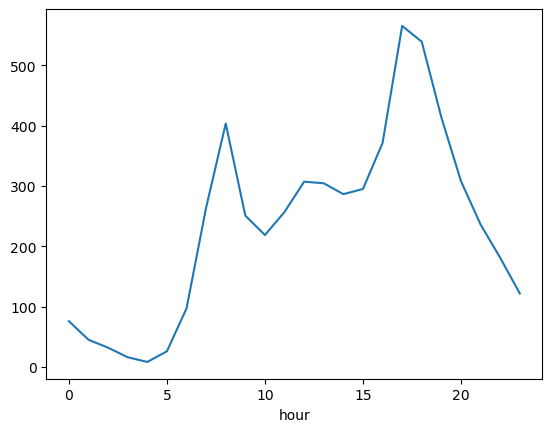

In [10]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos 
bikes[bikes['season'] == 3].groupby('hour').total.mean().plot()

Aunque la tendencia muestra picos similares, con alta demanda a las 5 de la tarde y baja a las 4 de la mañana, el número de alquileres de bicicletas varía considerablemente entre estaciones. En general, a las 4 de la mañana se alquilan 6 bicicletas y a las 5 de la tarde 469. En el verano las cifras aumentan a 8 y 565 respectivamente y en invierno disminuyen a 3 y 283 respectivamente.

La inclusión de la variable "season" o "estación" es esencial para predecir la demanda de alquileres, ya que influye significativamente

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [11]:
# Celda 3

import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#Eliminar datos atipicos
Base = bikes[['total','hour','season']]
Q1 = Base['total'].quantile(0.25)
Q3 = Base['total'].quantile(0.75)
IQR = Q3 - Q1
Limite_Inferior  = Q1 - 1.5 * IQR
Limite_Superior  = Q3 + 1.5 * IQR
Base_sin_atipicos = Base[(Base['total'] >= Limite_Inferior) & (Base['total'] <= Limite_Superior)]
Base_sin_atipicos

# Transformación "Season"
Base_dummies = pd.get_dummies(Base_sin_atipicos, columns=['season'], drop_first=True)
Base_dummies

#Partición de la Base
X = Base_dummies.drop(columns=['total'])
y = Base_dummies['total']
X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size=0.33, random_state=0)

#Entreamiento de modelo
lr = linear_model.LinearRegression()
lr.fit(X_Train, y_Train)
y_Pred = lr.predict(X_Test)

#Metricas
MSE = mean_squared_error(y_Test, y_Pred)
RMSE = np.sqrt(MSE)
n = len(y_Test)
p = X_Test.shape[1]
R2 = r2_score(y_Test, y_Pred)
R2_Ajustado = 1 - (1 - R2) * (n - 1) / (n - p - 1)

print("MSE:", MSE)
print("RMSE:", RMSE)
print("R2 Ajustado:", R2_Ajustado)
print("\n")

Coeficientes_Modelo = lr.coef_
print("Coeficientes del Modelo")
for variable, coeficiente in zip(X.columns, Coeficientes_Modelo):
    print(variable, ":", coeficiente)

MSE: 19210.98632968569
RMSE: 138.60370243859177
R2 Ajustado: 0.2303437856995414


Coeficientes del Modelo
hour : 9.65437524866283
season_2 : 89.56783936297128
season_3 : 101.44835497091539
season_4 : 75.64124924091753


Se observa que la variable más influyente en el modelo es si la estación es verano, ya que su coeficiente es el mayor (101). Sin embargo, es importante resaltar que el modelo no tiene un buen poder predictivo, pues se tiene un bajo R2 ajustado (0.23), indicando que el modelo explica solo el 23% de la variabilidad en los datos. 

Además, el RMSE es de 139 lo que indica que las predicciones tienen una diferencia promedio de 139 bicicletas con respecto a los datos reales, aunque la estación de verano parece ser una variable importante, el modelo en general no es efectivo para predecir la demanda de alquiler de bicicletas.

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [12]:
# Celda 4

#Particion de la base
X = Base.drop(columns=['total'])
y = (Base['total'] > Base['total'].median()).astype(int)
X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size=0.33, random_state=0)

# Definición de la función que calcula el gini index
def gini(y):
    if y.shape[0] == 0:
        return 0
    else:
        return 1 - (y.mean()**2 + (1 - y.mean())**2)
    
# Definición de la función gini_imputiry para calular la ganancia de una variable predictora j dado el punto de corte k
def gini_impurity(X_col, y, split):
    
    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]
    
    n_l = y_l.shape[0]
    n_r = y_r.shape[0]
    
    gini_y = gini(y)
    gini_l = gini(y_l)
    gini_r = gini(y_r)
    
    gini_impurity_ = gini_y - (n_l / (n_l + n_r) * gini_l + n_r / (n_l + n_r) * gini_r)
    
    return gini_impurity_

# Definición de la función best_split para calcular cuál es la mejor variable y punto de cortepara hacer la bifurcación del árbol
def best_split(X, y, num_pct=10):
    
    features = range(X.shape[1])
    
    best_split = [0, 0, 0]  # j, split, gain
    
    # Para todas las varibles 
    for j in features:
        
        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]
        
        # Para cada partición
        for split in splits:
            gain = gini_impurity(X.iloc[:, j], y, split)
                        
            if gain > best_split[2]:
                best_split = [j, split, gain]
    
    return best_split


def tree_grow(X, y, level=0, min_gain=0.001, max_depth=None, num_pct=10):
    
    # Si solo es una observación
    if X.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0], y_prob=0.5, level=level, split=-1, n_samples=1, gain=0)
        return tree
    
    # Calcular la mejor división
    j, split, gain = best_split(X, y, num_pct)
    
    # Guardar el árbol y estimar la predicción
    y_pred = int(y.mean() >= 0.5) 
    y_prob = (y.sum() + 1.0) / (y.shape[0] + 2.0)  # Corrección Laplace 
    
    tree = dict(y_pred=y_pred, y_prob=y_prob, level=level, split=-1, n_samples=X.shape[0], gain=gain)
    # Revisar el criterio de parada 
    if gain < min_gain:
        return tree
    if max_depth is not None:
        if level >= max_depth:
            return tree   
    
    # Continuar creando la partición
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]

    # Siguiente iteración para cada partición
    
    tree['sl'] = tree_grow(X_l, y_l, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    
    return tree

tree = tree_grow(X, y, level=0, min_gain=0.001, max_depth=6, num_pct=10)

def tree_predict(X, tree, proba=False):
    
    predicted = np.ones(X.shape[0])

    # Revisar si es el nodo final
    if tree['split'] == -1:
        if not proba:
            predicted = predicted * tree['y_pred']
        else:
            predicted = predicted * tree['y_prob']
            
    else:
        
        j, split = tree['split']
        filter_l = (X.iloc[:, j] < split)
        X_l = X.loc[filter_l]
        X_r = X.loc[~filter_l]

        if X_l.shape[0] == 0:  # Si el nodo izquierdo está vacio solo continua con el derecho 
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)
        elif X_r.shape[0] == 0:  #  Si el nodo derecho está vacio solo continua con el izquierdo
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
        else:
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)

    return predicted

tree_predict(X, tree)

array([0., 0., 0., ..., 1., 0., 0.])

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

In [13]:
def metricas(predicciones, prediccionesProb):
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import precision_score
    from sklearn.metrics import confusion_matrix
    from sklearn import metrics
    #### Metricas
    accuracy=accuracy_score(y_true=y_Test, y_pred=predicciones)
    precision=precision_score(y_true=y_Test, y_pred=predicciones)
    
    tn, fp, fn, tp = confusion_matrix(y_true=y_Test, y_pred=predicciones).ravel()
    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)
    f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)

    print("\n")
    print(confusion_matrix(y_true=y_Test, y_pred=predicciones))
    print("Verdaderos Negativos (TN):", tn)
    print("Falsos Positivos (FP):", fp)
    print("Falsos Negativos (FN):", fn)
    print("Verdaderos Positivos (TP):", tp)

    print('\n')
    print('La exactitud del modelo es:' + str(round(accuracy,3)))
    print('La precisión del modelo es:' + str(round(precision,3)))
    print('La especificidad del modelo es:', round(specificity, 3))
    print('La sensibilidad del modelo es:', round(sensitivity, 3))
    print('El F1-Score del modelo es:', round(f1_score, 3))
    print("\n")
    
    ### Curva de ROC
    fpr, tpr, thresholds = metrics.roc_curve(y_Test, prediccionesProb[:,1], pos_label=1)
    AUC=metrics.auc(fpr, tpr)
    
    plt.title('Curva ROC')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUC)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.01, 1])
    plt.ylim([0, 1.05])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    ### Comparación de las metricas del modelo
    fig = plt.figure(figsize=(10, 2))
    ax = fig.add_axes([0,0,1,1])
    ax.set_title("Comparación de métricas")
    ejeX = ['Exactitud', 'Precisión','AUC','Especificidad','Sensibilidad','F1-Score']
    ejeY = [round(accuracy,3),round(precision,3),round(AUC,3),round(specificity,3),round(sensitivity,3),round(f1_score,3)]
    ax.bar(ejeX,ejeY)
    def addlabels(x,y,plotP):
        for i in range(len(x)):
            plotP.text(i,y[i],y[i])
    addlabels(ejeX,ejeY,plt)
    plt.show()
    print('\n')


ARBOL DE REGRESION
MSE: 0.11171993673583062
RMSE: 0.33424532417945746
R2 Ajustado: 0.5523294636625651


Importancia de las variables
  feature  importance
1  season    0.163089
0    hour    0.836911

ARBOL DE CLASIFICACION


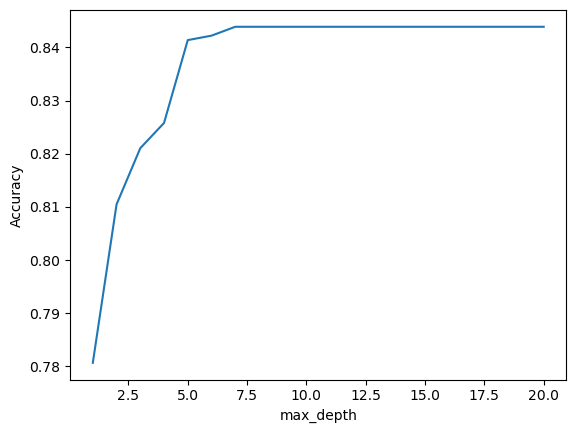

Mejor Profundidad: (0.8438630670748678, 20)


[[1400  334]
 [ 227 1632]]
Verdaderos Negativos (TN): 1400
Falsos Positivos (FP): 334
Falsos Negativos (FN): 227
Verdaderos Positivos (TP): 1632


La exactitud del modelo es:0.844
La precisión del modelo es:0.83
La especificidad del modelo es: 0.807
La sensibilidad del modelo es: 0.878
El F1-Score del modelo es: 0.853




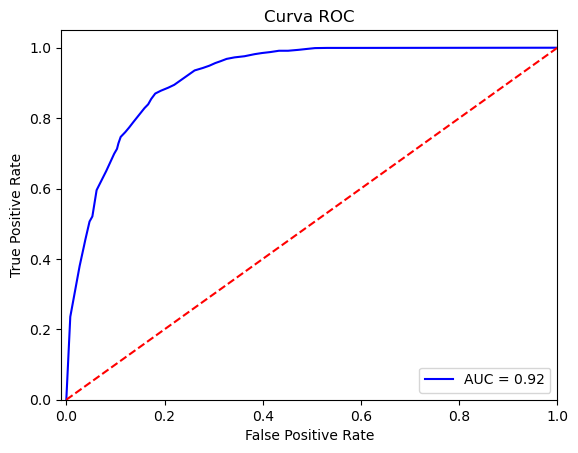

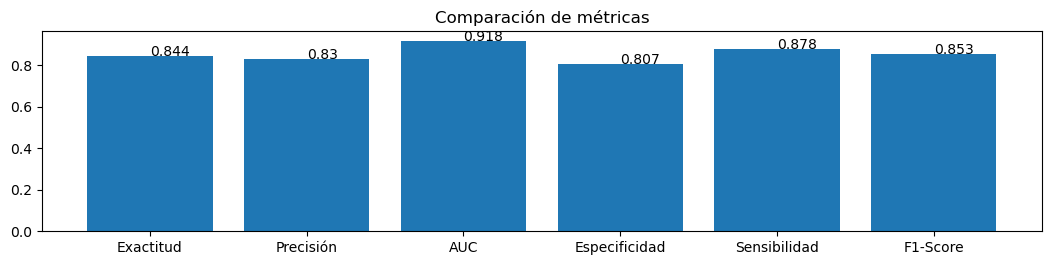



Importancia de las variables
  feature  importance
1  season    0.161117
0    hour    0.838883


In [14]:
# Celda 5

#Particion de la base
X = Base.drop(columns=['total'])
y = (Base['total'] > Base['total'].median()).astype(int)
X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size=0.33, random_state=0)

# ARBOL DE REGRESION
Arbol_Regresion = DecisionTreeRegressor(random_state=0)
Arbol_Regresion.fit(X_Train, y_Train)
y_Pred = Arbol_Regresion.predict(X_Test)

#Metricas
MSE = mean_squared_error(y_Test, y_Pred)
RMSE = np.sqrt(MSE)
n = len(y_Test)
p = X_Test.shape[1]
R2 = r2_score(y_Test, y_Pred)
R2_Ajustado = 1 - (1 - R2) * (n - 1) / (n - p - 1)

print("\033[1m\nARBOL DE REGRESION\033[0m")
print("MSE:", MSE)
print("RMSE:", RMSE)
print("R2 Ajustado:", R2_Ajustado)
print("\n")

# Uso de la función .feature_importances_ para obtener la importancia de cada variable
print("\033[1mImportancia de las variables\033[0m")
print(pd.DataFrame({'feature':X.columns, 'importance':Arbol_Regresion.feature_importances_}).sort_values('importance'))


# ARBOL DE CLASIFICACION
# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 21)

# Lista para guardar los valores del RMSE para cada valor de máxima profundidad (max_depth)
accuracy_scores = []

# Importación de modelos de sklearn 
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    clf.fit(X_Train, y_Train)
    y_Pred = clf.predict(X_Test)
    Accuracy = accuracy_score(y_Test, y_Pred)
    accuracy_scores.append(Accuracy)
    
print("\033[1m\nARBOL DE CLASIFICACION\033[0m")
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.show()

# Mejor accuracy (desempeño del modelo) y su correspondiente max_depth
print("Mejor Profundidad:",sorted(zip(accuracy_scores, max_depth_range))[::-1][0])

# max_depth = 7 fue el mejor, se ajusta un árbol usando este valor 
clf = DecisionTreeClassifier(max_depth=7, random_state=1)
clf.fit(X_Train, y_Train)
predicciones = clf.predict(X_Test)
prediccionesProb = clf.predict_proba(X_Test)
metricas(predicciones,prediccionesProb)

# Uso de la función .feature_importances_ para obtener la importancia de cada variable
print("\033[1mImportancia de las variables\033[0m")
print(pd.DataFrame({'feature':X.columns, 'importance':clf.feature_importances_}).sort_values('importance'))

Como se puede observar, al ejecutar un árbol de regresión, tanto el MSE como el RMSE disminuyen significativamente en comparación con el modelo de regresión lineal. El MSE disminuye de 19210 a 0.11, mientras que el RMSE pasa de 139 a 0.33. Además, el R2 Ajustado aumenta de 0.23 a 0.55, lo que indica un mejor desempeño del modelo, sin embargo, es importante resaltar que el valor del R2 Ajustado es cercano a 0.5 lo que indica que el modelo podría no explicar de manera precisa toda la variabilidad de los datos.

Al ejecutar un árbol de clasificación, considerando que 1 representa los datos que se encuentran por encima de la mediana, se observa un desempeño superior del modelo. La exactitud alcanza un valor de 0.84, mientras que el AUC es de 0.92, Además, al comparar la especificidad y la sensibilidad, se evidencia que ambas se encuentran muy cercanas, lo que indica un buen poder de predicción para ambas categorías.

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [15]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [16]:
Base = df.drop(['url', 'Popular'], axis=1).copy()
Analisis_Descriptivo = round(Base.describe(),2)
Variables_Numericas = Analisis_Descriptivo.columns
coef_var = (Base[Variables_Numericas].std() / Base[Variables_Numericas].mean())
Analisis_Descriptivo.loc['coef_var'] = coef_var
Analisis_Descriptivo = Analisis_Descriptivo.round(2)
Analisis_Descriptivo

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
count,6000.00,6000.00,6000.00,6000.00,6000.00,6000.00,6000.00,6000.00,6000.00,6000.00,...,6000.00,6000.00,6000.00,6000.00,6000.00,6000.00,6000.00,6000.00,6000.00,6000.00
mean,358.14,10.37,547.43,0.53,0.96,0.67,11.87,3.27,4.95,1.46,...,0.36,0.10,0.76,-0.27,-0.53,-0.11,0.30,0.08,0.34,0.17
std,210.73,2.11,510.23,0.15,0.19,0.17,13.44,4.26,8.64,4.51,...,0.11,0.08,0.26,0.13,0.29,0.10,0.33,0.28,0.19,0.24
min,9.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,-1.00,-1.00,-1.00,0.00,-1.00,0.00,0.00
25%,175.00,9.00,231.00,0.47,1.00,0.62,4.00,1.00,1.00,0.00,...,0.31,0.05,0.60,-0.34,-0.71,-0.12,0.00,0.00,0.17,0.00
50%,345.00,10.00,391.00,0.54,1.00,0.69,8.00,2.00,1.00,0.00,...,0.36,0.10,0.80,-0.26,-0.50,-0.10,0.20,0.00,0.50,0.02
75%,544.25,12.00,719.00,0.61,1.00,0.76,15.00,4.00,7.00,1.00,...,0.42,0.10,1.00,-0.19,-0.30,-0.05,0.50,0.17,0.50,0.25
max,731.00,19.00,8474.00,0.97,1.00,1.00,304.00,116.00,111.00,91.00,...,1.00,1.00,1.00,0.00,0.00,0.00,1.00,1.00,0.50,1.00
coef_var,0.59,0.20,0.93,0.28,0.20,0.25,1.13,1.30,1.74,3.08,...,0.31,0.79,0.34,-0.50,-0.56,-0.91,1.13,3.66,0.54,1.43


Al realizar el análisis descriptivo, se observa la presencia de valores atípicos.

In [17]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [18]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.


ARBOL DE CLASIFICACION


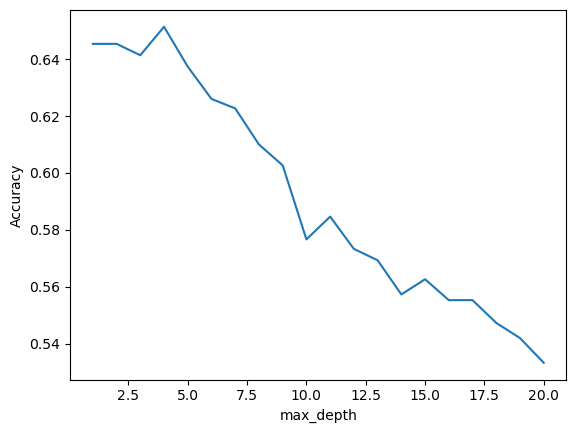

Mejor Profundidad: (0.6513333333333333, 4)


[[523 221]
 [302 454]]
Verdaderos Negativos (TN): 523
Falsos Positivos (FP): 221
Falsos Negativos (FN): 302
Verdaderos Positivos (TP): 454


La exactitud del modelo es:0.651
La precisión del modelo es:0.673
La especificidad del modelo es: 0.703
La sensibilidad del modelo es: 0.601
El F1-Score del modelo es: 0.635




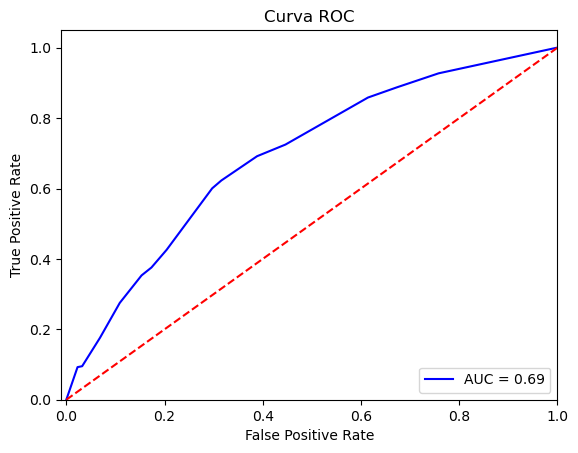

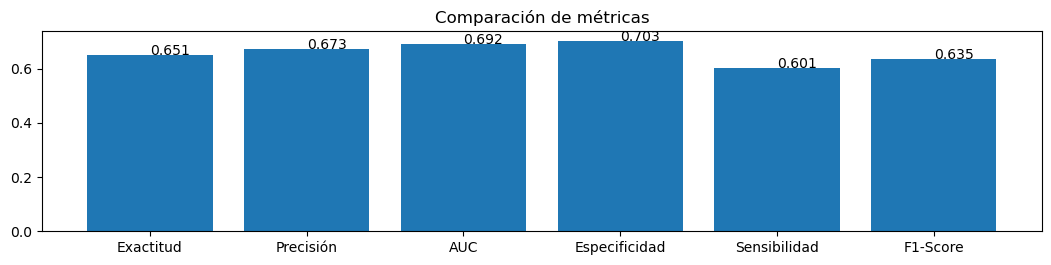



Importancia de las variables
                          feature  importance
0                       timedelta    0.000000
30              weekday_is_monday    0.000000
31             weekday_is_tuesday    0.000000
32           weekday_is_wednesday    0.000000
33            weekday_is_thursday    0.000000
34              weekday_is_friday    0.000000
35            weekday_is_saturday    0.000000
36              weekday_is_sunday    0.000000
37                     is_weekend    0.000000
38                         LDA_00    0.000000
40                         LDA_02    0.000000
41                         LDA_03    0.000000
43            global_subjectivity    0.000000
44      global_sentiment_polarity    0.000000
45     global_rate_positive_words    0.000000
46     global_rate_negative_words    0.000000
47            rate_positive_words    0.000000
48            rate_negative_words    0.000000
49          avg_positive_polarity    0.000000
50          min_positive_polarity    0.000000
51 

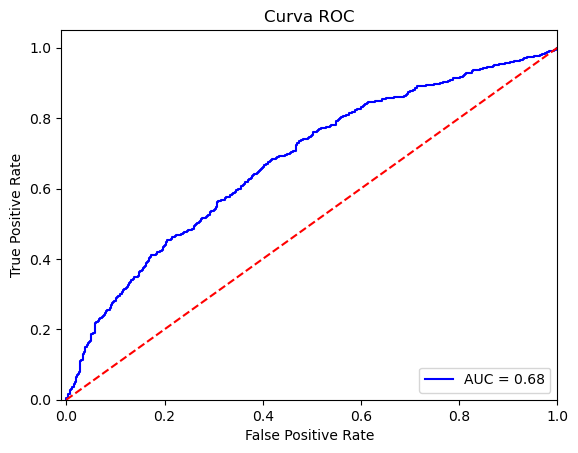

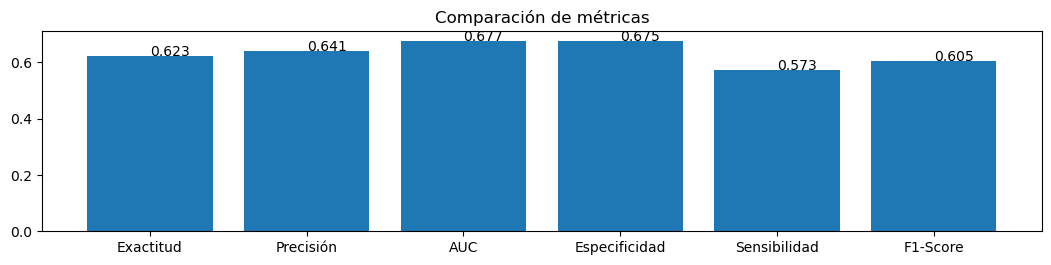

In [19]:
# Celda 6

# ARBOL DE CLASIFICACION
# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 21)

# Lista para guardar los valores del RMSE para cada valor de máxima profundidad (max_depth)
accuracy_scores = []

# Importación de modelos de sklearn 
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    clf.fit(X_Train, y_Train)
    y_Pred = clf.predict(X_Test)
    Accuracy = accuracy_score(y_Test, y_Pred)
    accuracy_scores.append(Accuracy)
    
print("\033[1m\nARBOL DE CLASIFICACION\033[0m")
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.show()

# Mejor accuracy (desempeño del modelo) y su correspondiente max_depth
print("Mejor Profundidad:",sorted(zip(accuracy_scores, max_depth_range))[::-1][0])

# max_depth = 4 fue el mejor, se ajusta un árbol usando este valor 
clf = DecisionTreeClassifier(max_depth = 4, random_state=1)
clf.fit(X_Train, y_Train)
predicciones = clf.predict(X_Test)
prediccionesProb = clf.predict_proba(X_Test)
metricas(predicciones,prediccionesProb)

# Uso de la función .feature_importances_ para obtener la importancia de cada variable
print("\033[1mImportancia de las variables\033[0m")
print(pd.DataFrame({'feature':X.columns, 'importance':clf.feature_importances_}).sort_values('importance'))


##REGRESION LOGISTICA
from sklearn.linear_model import LogisticRegression
clfRegLog= LogisticRegression(random_state=0  ,max_iter=10000)
clfRegLog.fit(X_Train,y_Train)
predicciones=clfRegLog.predict(X_Test)
prediccionesProb=clfRegLog.predict_proba(X_Test)
print("\033[1m\nREGRESION LOGISTICA\033[0m")
metricas(predicciones,prediccionesProb)


### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged donde:

-las primeras 100 muestras vienen de árboles de decisión donde max_depth tome un valor de su elección\
-las segundas 100 muestras vienen de árboles de decisión donde min_samples_leaf tome un valor de su elección\
-las últimas 100 muestras vienen de regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

Nota: 

Para este ensamble de 300 modelos, deben hacer votación mayoritaria. Esto lo pueden hacer de distintas maneras. La más "fácil" es haciendo la votación "manualmente", como se hace a partir del minuto 5:45 del video de Ejemplo práctico de emsablajes en Coursera. Digo que es la más fácil porque si hacen la votación mayoritaria sobre las 300 predicciones van a obtener lo que se espera.

Otra opción es: para cada uno de los 3 tipos de modelos, entrenar un ensamble de 100 modelos cada uno. Predecir para cada uno de esos tres ensambles y luego predecir como un ensamble de los 3 ensambles. La cuestión es que la votación mayoritaria al usar los 3 ensambles no necesariamente va a generar el mismo resultado que si hacen la votación mayoritaria directamente sobre los 300 modelos. Entonces, para los que quieran hacer esto, deben hacer ese último cálculo con cuidado.

Para los que quieran hacerlo como ensamble de ensambles, digo que se debe hacer el ensamble final con cuidado por lo siguiente. Supongamos que:

* para los 100 árboles del primer tipo, la votación mayoritaria es: 55% de los modelos predicen que la clase de una observación es "1"
* para los 100 árboles del segundo tipo, la votación mayoritaria es: 55% de los modelos predicen que la clase de una observación es "1"
* para las 100 regresiones logísticas, la votación mayoritaria es: 10% de los modelos predicen que la clase de una observación es "1"

Si se hace la votación mayoritaria de los 300 modelos, la predicción de esa observación debería ser: (100*55%+100*55%+100*10%)/300 = 40% de los modelos votan porque la predicción debería ser "1". Es decir, la predicción del ensamble es "0" (dado que menos del 50% de modelos predijo un 1).

Sin embargo, si miramos cada ensamble por separado, el primer ensamble predice "1", el segundo ensamble predice "1" y el último ensamble predice "0". Si hago votación mayoritaria sobre esto, la predicción va a ser "1", lo cual es distinto a si se hace la votación mayoritaria sobre los 300 modelos.

In [20]:
#Librerias
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

#Particion de la base
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

#Parámetros para los árboles de decisión
valor_max_depth = 5
valor_min_samples_leaf = 10

# Creación de 300 muestras de bootstrap
n_estimators = 300
np.random.seed(123)
n_samples = X_train.shape[0]
samples_Ini = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(n_estimators)]

In [21]:
#Seleccion de las primeras 100 muestras
n_estimators = len(samples_Ini[0:100])
samples = samples_Ini[0:100]

# Entrenamiento de 100 modelos con las 100 muestras boostrap
np.random.seed(123) 
seeds = np.random.randint(1, 10000, size=n_estimators)
trees = {}
for i in range(n_estimators):
    trees[i] = DecisionTreeClassifier(max_features="sqrt", max_depth=valor_max_depth, random_state=seeds[i])
    trees[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])
    
# Predicción para los datos del set de test con cada modelo
y_pred_df = pd.DataFrame(index=X_test.index, columns=list(range(n_estimators)))
for i in range(n_estimators):
    y_pred_df.iloc[:, i] = trees[i].predict(X_test)

# Votación mayoritaria
y_pred = (y_pred_df.sum(axis=1) >= (n_estimators / 2)).astype(int)
y_pred_Arbol_1 = y_pred.copy()

# Desempeño al hacer votación mayoritaria
from sklearn import metrics
print("F1-Score:", metrics.f1_score(y_pred, y_test))

# Desempeño al hacer votación mayoritaria
print("Accuracy Score:", metrics.accuracy_score(y_pred, y_test))

F1-Score: 0.6666666666666666
Accuracy Score: 0.6666666666666666


In [22]:
#Seleccion de las segundas 100 muestras
n_estimators = len(samples_Ini[100:200])
samples = samples_Ini[100:200]

# Entrenamiento de 100 modelos con las 100 muestras boostrap
np.random.seed(123) 
seeds = np.random.randint(1, 10000, size=n_estimators)
trees = {}
for i in range(n_estimators):
    trees[i] = DecisionTreeClassifier(max_features="sqrt", max_depth=None,min_samples_leaf = valor_min_samples_leaf, random_state=seeds[i])
    trees[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])
    
# Predicción para los datos del set de test con cada modelo
y_pred_df = pd.DataFrame(index=X_test.index, columns=list(range(n_estimators)))
for i in range(n_estimators):
    y_pred_df.iloc[:, i] = trees[i].predict(X_test)

# Votación mayoritaria
y_pred = (y_pred_df.sum(axis=1) >= (n_estimators / 2)).astype(int)
y_pred_Arbol_2 = y_pred.copy()

# Desempeño al hacer votación mayoritaria
from sklearn import metrics
print("F1-Score:", metrics.f1_score(y_pred, y_test))

# Desempeño al hacer votación mayoritaria
print("Accuracy Score:", metrics.accuracy_score(y_pred, y_test))

F1-Score: 0.6384142173615858
Accuracy Score: 0.6473333333333333


In [23]:
#Seleccion de las ultimas 100 muestras
n_estimators = len(samples_Ini[200:300])
samples = samples_Ini[200:300]

# Entrenamiento de 100 modelos con las 100 muestras boostrap
np.random.seed(123) 
seeds = np.random.randint(1, 10000, size=n_estimators)
modelos = {}
for i in range(n_estimators):
    modelos[i] = LogisticRegression(random_state=seeds[i])
    modelos[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])
    
# Predicción para los datos del set de test con cada modelo
y_pred_df = pd.DataFrame(index=X_test.index, columns=list(range(n_estimators)))
for i in range(n_estimators):
    y_pred_df.iloc[:, i] = modelos[i].predict(X_test)

# Votación mayoritaria
y_pred = (y_pred_df.sum(axis=1) >= (n_estimators / 2)).astype(int)
y_pred_Reg_Log = y_pred.copy()

# Desempeño al hacer votación mayoritaria
from sklearn import metrics
print("F1-Score:", metrics.f1_score(y_pred, y_test))

# Desempeño al hacer votación mayoritaria
print("Accuracy Score:", metrics.accuracy_score(y_pred, y_test))

F1-Score: 0.6111111111111112
Accuracy Score: 0.6173333333333333


In [24]:
Total = pd.concat([y_pred_Arbol_1, y_pred_Arbol_2, y_pred_Reg_Log], axis=1)

Total_Prediccion = (Total.sum(axis=1) >= (Total.shape[1] / 2)).astype(int)
print("F1-Score:", f1_score(y_test, Total_Prediccion))
print("Accuracy Score:", accuracy_score(y_test, Total_Prediccion))

F1-Score: 0.6504065040650406
Accuracy Score: 0.656


Los resultados son bastante similares, aunque se evidencia un ligero mejor desempeño para F1 y exactitud en el modelo que utiliza las primeras 100 muestras y tiene el parámetro valor_max_depth establecido en 5

### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [25]:
# Celda 8
#Seleccion de las primeras 100 muestras
n_estimators = len(samples_Ini[0:100])
samples = samples_Ini[0:100]

# Entrenamiento de 100 modelos con las 100 muestras boostrap
np.random.seed(123) 
seeds = np.random.randint(1, 10000, size=n_estimators)
trees = {}
for i in range(n_estimators):
    trees[i] = DecisionTreeClassifier(max_features="sqrt", max_depth=valor_max_depth, random_state=seeds[i])
    trees[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])
    
# Predicción para los datos del set de test con cada modelo
y_pred_df = pd.DataFrame(index=X_test.index, columns=list(range(n_estimators)))
for i in range(n_estimators):
    y_pred_df.iloc[:, i] = trees[i].predict(X_test)

    
samples_oob = []
# Obtención de las observaciones fuera de la bolsa "out-of-bag" para cada muestra
for sample in samples:
    samples_oob.append(sorted(set(range(n_samples)) - set(sample)))    
    
    
# Estimación de los errores OOB para cada clasificador
errors = np.zeros(n_estimators)

for i in range(n_estimators):
    y_pred_ = trees[i].predict(X_train.iloc[samples_oob[i]])
    errors[i] = 1 - metrics.accuracy_score(y_train.iloc[samples_oob[i]], y_pred_)
    
# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
alpha = (1 - errors) / (1 - errors).sum()    


# Ponderación de las predicciones con los pesos alpha
weighted_sum_1 = ((y_pred_df) * alpha).sum(axis=1)
weighted_sum_1.head(20)


# Desempeño al hacer votación ponderada
y_pred = (weighted_sum_1 >= 0.5).astype(int)
print("F1-Score:", metrics.f1_score(y_pred, y_test))

# Desempeño al hacer votación mayoritaria
print("Accuracy Score:",  metrics.accuracy_score(y_pred, y_test))

F1-Score: 0.6635451505016723
Accuracy Score: 0.6646666666666666


In [26]:
#Seleccion de las segundas 100 muestras
n_estimators = len(samples_Ini[100:200])
samples = samples_Ini[100:200]

# Entrenamiento de 100 modelos con las 100 muestras boostrap
np.random.seed(123) 
seeds = np.random.randint(1, 10000, size=n_estimators)
trees = {}
for i in range(n_estimators):
    trees[i] = DecisionTreeClassifier(max_features="sqrt", max_depth=None,min_samples_leaf = valor_min_samples_leaf, random_state=seeds[i])
    trees[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])
    
# Predicción para los datos del set de test con cada modelo
y_pred_df = pd.DataFrame(index=X_test.index, columns=list(range(n_estimators)))
for i in range(n_estimators):
    y_pred_df.iloc[:, i] = trees[i].predict(X_test)

samples_oob = []
# Obtención de las observaciones fuera de la bolsa "out-of-bag" para cada muestra
for sample in samples:
    samples_oob.append(sorted(set(range(n_samples)) - set(sample)))    
    
    
# Estimación de los errores OOB para cada clasificador
errors = np.zeros(n_estimators)

for i in range(n_estimators):
    y_pred_ = trees[i].predict(X_train.iloc[samples_oob[i]])
    errors[i] = 1 - metrics.accuracy_score(y_train.iloc[samples_oob[i]], y_pred_)
    
# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
alpha = (1 - errors) / (1 - errors).sum()    


# Ponderación de las predicciones con los pesos alpha
weighted_sum_1 = ((y_pred_df) * alpha).sum(axis=1)
weighted_sum_1.head(20)


# Desempeño al hacer votación ponderada
y_pred = (weighted_sum_1 >= 0.5).astype(int)
print("F1-Score:", metrics.f1_score(y_pred, y_test))

# Desempeño al hacer votación mayoritaria
print("Accuracy Score:",  metrics.accuracy_score(y_pred, y_test))

F1-Score: 0.6368638239339752
Accuracy Score: 0.648


In [27]:
#Seleccion de las ultimas 100 muestras
n_estimators = len(samples_Ini[200:300])
samples = samples_Ini[200:300]

# Entrenamiento de 100 modelos con las 100 muestras boostrap
np.random.seed(123) 
seeds = np.random.randint(1, 10000, size=n_estimators)
modelos = {}
for i in range(n_estimators):
    modelos[i] = LogisticRegression(random_state=seeds[i])
    modelos[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])
    
# Predicción para los datos del set de test con cada modelo
y_pred_df = pd.DataFrame(index=X_test.index, columns=list(range(n_estimators)))
for i in range(n_estimators):
    y_pred_df.iloc[:, i] = modelos[i].predict(X_test)

samples_oob = []
# Obtención de las observaciones fuera de la bolsa "out-of-bag" para cada muestra
for sample in samples:
    samples_oob.append(sorted(set(range(n_samples)) - set(sample)))    
    
    
# Estimación de los errores OOB para cada clasificador
errors = np.zeros(n_estimators)

for i in range(n_estimators):
    y_pred_ = trees[i].predict(X_train.iloc[samples_oob[i]])
    errors[i] = 1 - metrics.accuracy_score(y_train.iloc[samples_oob[i]], y_pred_)
    
# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
alpha = (1 - errors) / (1 - errors).sum()    


# Ponderación de las predicciones con los pesos alpha
weighted_sum_1 = ((y_pred_df) * alpha).sum(axis=1)
weighted_sum_1.head(20)


# Desempeño al hacer votación ponderada
y_pred = (weighted_sum_1 >= 0.5).astype(int)
print("F1-Score:", metrics.f1_score(y_pred, y_test))

# Desempeño al hacer votación mayoritaria
print("Accuracy Score:",  metrics.accuracy_score(y_pred, y_test))

F1-Score: 0.6092265943012212
Accuracy Score: 0.616


Los resultados son bastante similares, aunque se evidencia un ligero mejor desempeño para F1 y exactitud en el modelo que utiliza las primeras 100 muestras y tiene el parámetro valor_max_depth establecido en 5

### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

Los ensamblajes muestran mejoras en F1 y exactitud en comparación con un árbol de decisión o un modelo de regresión logística, con un aumento de hasta 0.06 aproximadamente. Sin embargo, esta mejora viene acompañada de la desventaja de que los modelos desarrollados en los puntos 7 y 8 son más complejos y requieren más tiempo computacional. Por lo que, la ganancia en este caso es relativamente baja en comparación con la complejidad añadida.